## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [33]:
df = pd.read_csv('QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [34]:
print(df.head())
df.tail()

                     m     TagName  posts
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124


,m,TagName,posts
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [35]:
print(df.size)  # row*col
print(df.shape) # (row, col)
print(df.ndim)  # Dimension of dataframe

5973
(1991, 3)
2


**Challenge**: Count the number of entries in each column of the dataframe

In [36]:
df.count()

m          1991
TagName    1991
posts      1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [37]:
df.groupby('TagName').sum()

,posts
TagName,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [38]:
df.groupby('TagName').count()['m'].sort_values(ascending = False)

TagName
c#            145
assembly      144
c             144
c++           144
delphi        144
java          144
javascript    144
perl          144
php           144
python        144
ruby          144
r             142
swift         135
go            129
Name: m, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [39]:
df['m'][1]

'2008-08-01 00:00:00'

In [40]:
df.m[1]

'2008-08-01 00:00:00'

In [41]:
df.m = pd.to_datetime(df.m)
df.head()

,m,TagName,posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [49]:
reshape_df = df.pivot(index='m', columns='TagName', values='posts')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [43]:
print(reshape_df.ndim)
print(reshape_df.shape)

2
(145, 14)


In [50]:
reshape_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

In [45]:
reshape_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [53]:
reshape_df.count().sort_values(ascending=False)

TagName
c#            145
assembly      144
c             144
c++           144
delphi        144
java          144
javascript    144
perl          144
php           144
python        144
ruby          144
r             142
swift         135
go            129
dtype: int64

In [58]:
reshape_df.fillna(0, inplace=True)
# <=>
reshape_df = reshape_df.fillna(0)

In [59]:
reshape_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

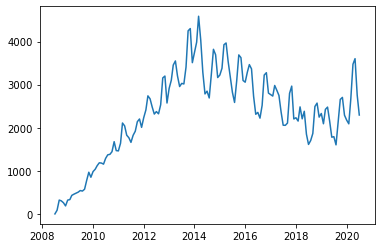

In [63]:
plt.plot(reshape_df.index, reshape_df['c'])

.figure() - allows us to resize our chart

.xticks() - configures our x-axis

.yticks() - configures our y-axis

.xlabel() - add text to the x-axis

.ylabel() - add text to the y-axis

.ylim() - allows us to set a lower and upper bound

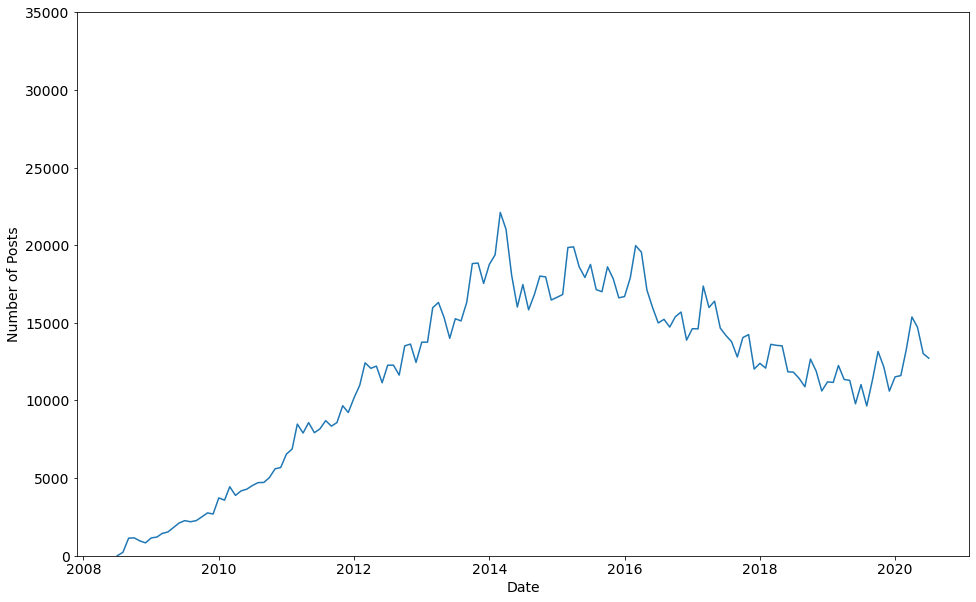

In [67]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshape_df.index, reshape_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

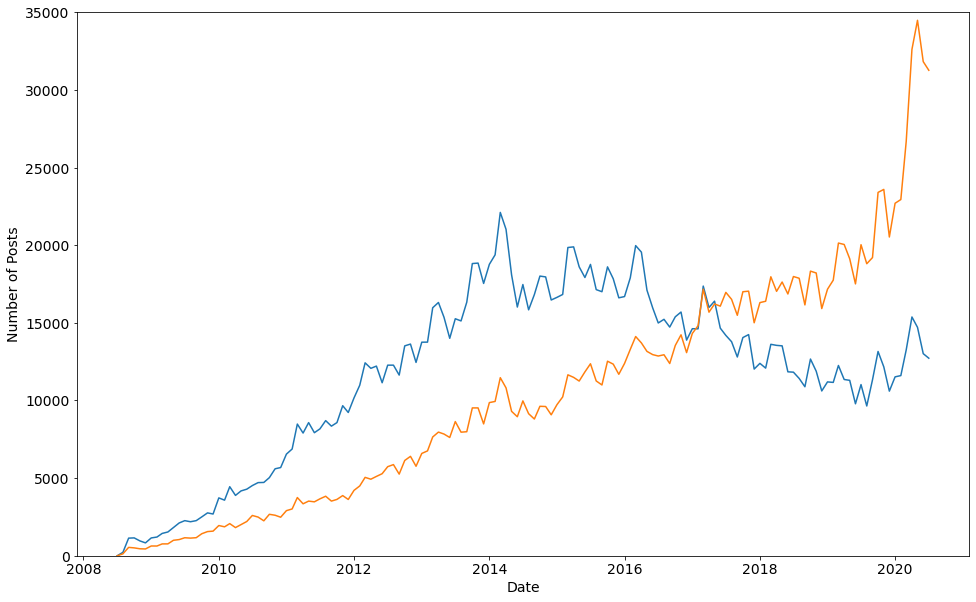

In [71]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshape_df.index, reshape_df.java)
plt.plot(reshape_df.index, reshape_df.python)

But what if we wanted to plot all the programming languages on the same chart? We don't want to type out .plot() a million times, right? We can actually just use a for-loop:

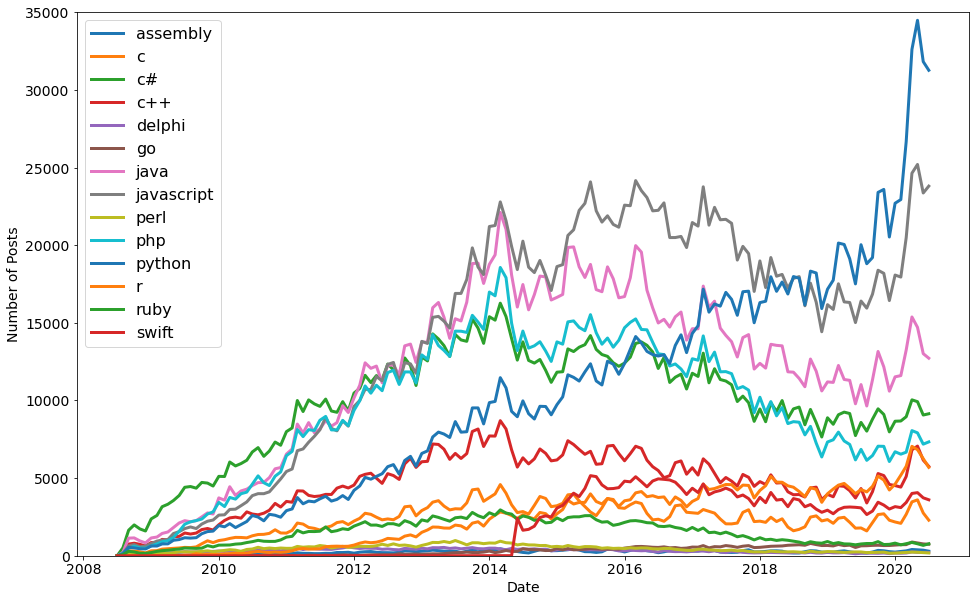

In [75]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshape_df.columns:
    plt.plot(reshape_df.index, reshape_df[column], label=reshape_df[column].name, linewidth=3)

plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

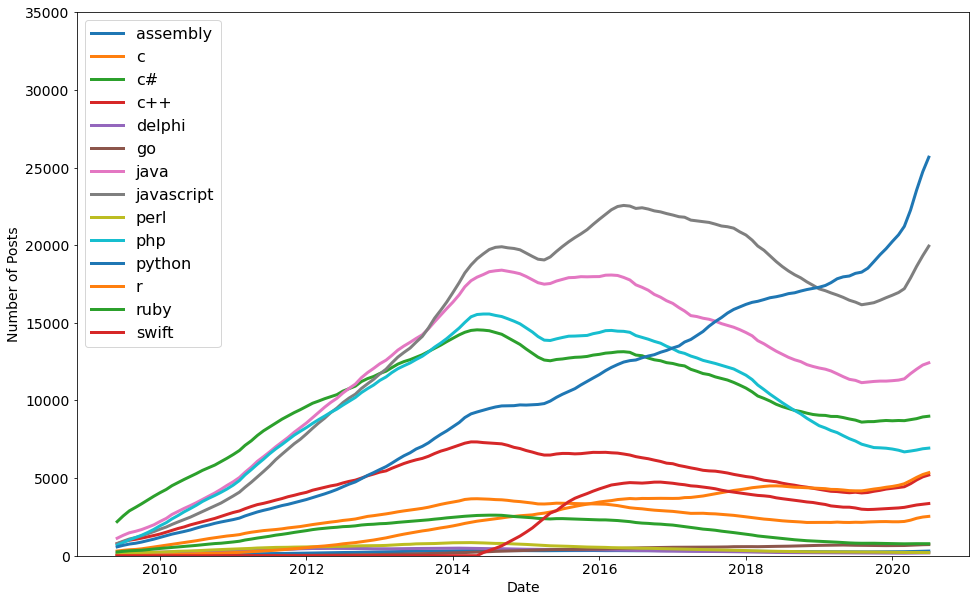

In [80]:
# The window is number of observations that are averaged
roll_df = reshape_df.rolling(window=12).mean()

plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], label=roll_df[column].name, linewidth=3)

plt.legend(fontsize=16) 

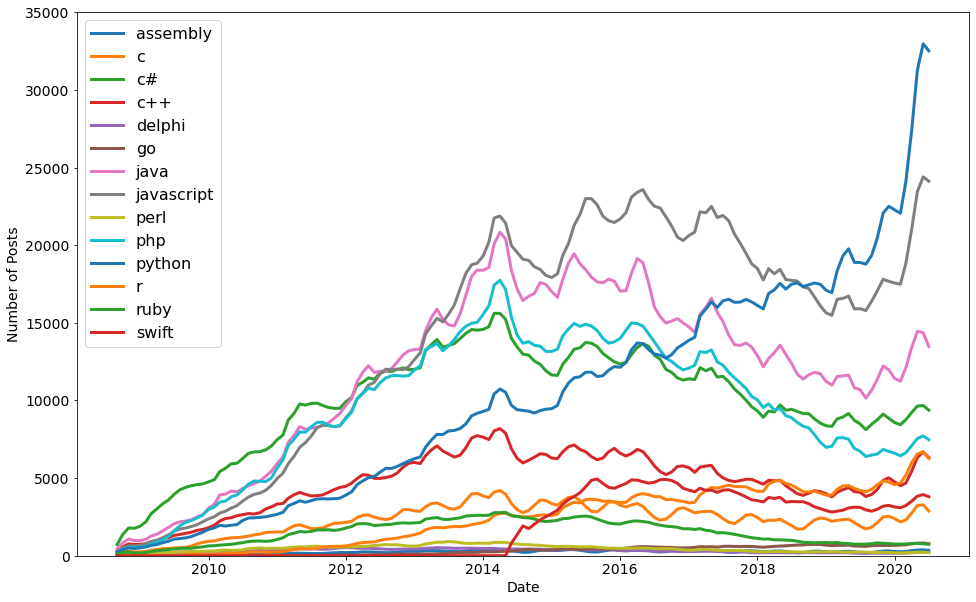

In [81]:
roll_df = reshape_df.rolling(window=3).mean()

plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], label=roll_df[column].name, linewidth=3)

plt.legend(fontsize=16) 

### ⚡ Sumary & Notes

- used .groupby() to explore the number of posts and entries per programming language
- converted strings to Datetime objects with to_datetime() for easier plotting
- reshaped our DataFrame by converting categories to columns using .pivot()
- used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()
- created (multiple) line charts using .plot() with a for-loop
- styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.
- added a legend to tell apart which line is which by colour
- smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.